**About Data set**

This dataset was developed by Pratham Tripathi with the features such as these : 

The target feature :

Drug type

The feature sets :
Age
Sex
Blood Pressure Levels (BP)
Cholesterol Levels
Na to Potassium Ration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**DATA**

In [2]:
data = pd.read_csv('../input/drug-classification/drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


**Data Exploration**

In [3]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [4]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [5]:
data1 = data.Sex.value_counts()
print(data1)
data2 = data.BP.value_counts()
print(data2)

M    104
F     96
Name: Sex, dtype: int64
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


In [6]:
data3 = data.Cholesterol.value_counts()
print(data3)
data4 = data.Drug.value_counts()
print(data4)

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


In [7]:
data.replace("drugX", "DrugX", inplace = True)
data.replace("drugA", "DrugA", inplace = True)
data.replace("drugC", "DrugC", inplace = True)
data.replace("drugB", "DrugB", inplace = True)
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,DrugC
2,47,M,LOW,HIGH,10.114,DrugC
3,28,F,NORMAL,HIGH,7.798,DrugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,DrugC
196,16,M,LOW,HIGH,12.006,DrugC
197,52,M,NORMAL,HIGH,9.894,DrugX
198,23,M,NORMAL,NORMAL,14.020,DrugX


This part aims to determine the missing value in this data

In [8]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

**Visualization**

Text(0, 0.5, 'Total Type of Sex')

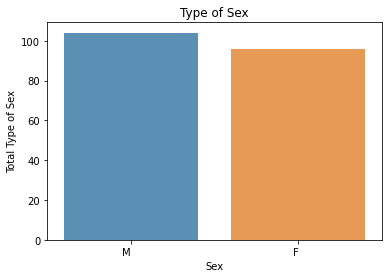

In [9]:
ax = sns.barplot(data1.index, data1.values, alpha = 0.8)
ax.set_xticklabels(ax.get_xticklabels(), ha ='right')
plt.title('Type of Sex')
plt.xlabel('Sex')
plt.ylabel('Total Type of Sex')

Text(0, 0.5, 'Total of Blood Preassure')

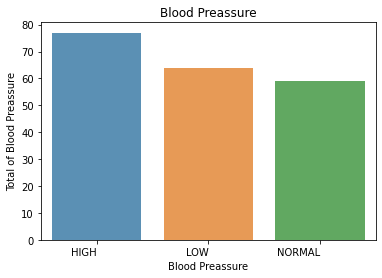

In [10]:
ax = sns.barplot(data2.index, data2.values, alpha = 0.8)
ax.set_xticklabels(ax.get_xticklabels(), ha ='right')
plt.title('Blood Preassure')
plt.xlabel('Blood Preassure')
plt.ylabel('Total of Blood Preassure')

Text(0, 0.5, 'Total of Cholesterol')

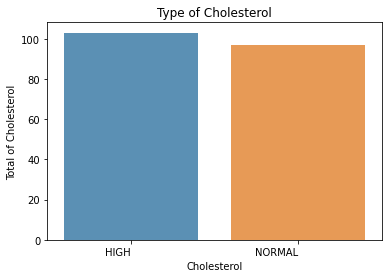

In [11]:
ax = sns.barplot(data3.index, data3.values, alpha = 0.8)
ax.set_xticklabels(ax.get_xticklabels(), ha ='right')
plt.title('Type of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Total of Cholesterol')

Text(0, 0.5, 'Total of Drug')

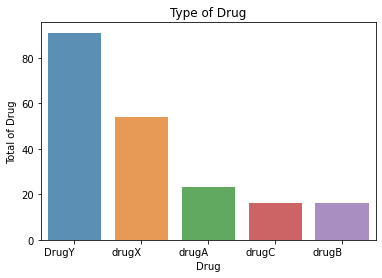

In [12]:
ax = sns.barplot(data4.index, data4.values, alpha = 0.8)
ax.set_xticklabels(ax.get_xticklabels(), ha ='right')
plt.title('Type of Drug')
plt.xlabel('Drug')
plt.ylabel('Total of Drug')

Text(0.5, 1.0, 'Box Plot for each Variable')

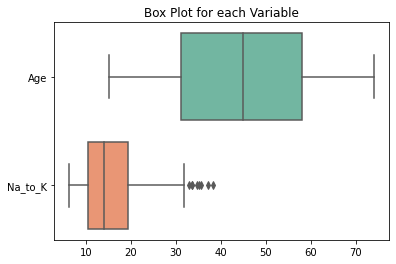

In [13]:
ax = sns.boxplot(data=data, orient="h", palette="Set2")
plt.title('Box Plot for each Variable')

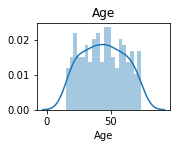

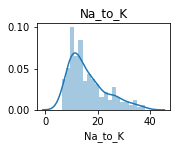

In [14]:
n = 0 
for x in ["Age", "Na_to_K"]:
    n = 1
    plt.subplot(2 , 2 , n)
    plt.subplots_adjust(hspace =0.5, wspace = 0.5)
    sns.distplot(data[x] , kde=True, bins = 20)
    plt.title(x)
    plt.show()

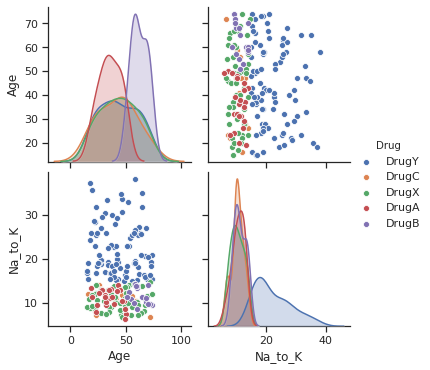

In [15]:
ax = sns.set(style="ticks", color_codes='pallete')
ax = sns.pairplot(data, hue="Drug")

Inisialization

In [16]:
Name= ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']

X = data[Name]
Y = data['Drug']

Splitting data into training and testing

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [18]:
X_train = pd.get_dummies(X_train,columns=Name,drop_first=True)
X_test = pd.get_dummies(X_test,columns=Name,drop_first=True)

**Support Vector Machine (SVM)**

In [19]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, Y_train)
print('Accuracy of SVM classifier on this training is {:.2f}'
     .format(svm.score(X_train, Y_train)))

Accuracy of SVM classifier on this training is 0.88


This is my second [[](http://)](http://)